In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from numpy import polyfit
from sklearn.preprocessing import MinMaxScaler

# EDA

In [2]:
df_train = pd.read_csv('train data.csv', parse_dates=['Trading Date'], index_col=['Trading Date'])
df_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1035 entries, 2022-02-28 to 2018-01-02
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Closing Price      1035 non-null   float64
 1   Opening Price      1035 non-null   float64
 2   Highest Price      1035 non-null   float64
 3   Lowest Price       1035 non-null   float64
 4   Trading Volume     1035 non-null   float64
 5   Percentage Change  1035 non-null   float64
dtypes: float64(6)
memory usage: 56.6 KB


In [3]:
df_train.head()

,Closing Price,Opening Price,Highest Price,Lowest Price,Trading Volume,Percentage Change
Trading Date,,,,,,
2022-02-28,35722.1,34851.7,36176.2,34851.7,45.76,2.83
2022-02-25,34738.2,34889.6,35078.8,34738.2,16.61,-0.22
2022-02-24,34813.9,35381.5,35457.2,34132.8,29.18,-1.50
2022-02-23,35343.7,35305.8,35722.1,35003.1,16.88,0.65
2022-02-22,35116.6,35041.0,35268.0,34586.9,22.97,-0.54


In [4]:
df_train.isnull().sum()

Closing Price        0
Opening Price        0
Highest Price        0
Lowest Price         0
Trading Volume       0
Percentage Change    0
dtype: int64

In [5]:
df_train.duplicated().sum()

0

In [6]:
df_train.describe()

,Closing Price,Opening Price,Highest Price,Lowest Price,Trading Volume,Percentage Change
count,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000
mean,18602.034686,18595.462029,18855.510918,18355.983768,22.632783,0.130966
std,10402.098023,10419.266763,10553.119121,10282.748995,14.440251,2.184544
min,7411.800000,7000.000000,7640.600000,6977.200000,3.320000,-6.990000
25%,11078.950000,11071.900000,11220.650000,10951.450000,11.635000,-0.960000
50%,13650.100000,13655.200000,13813.500000,13491.900000,19.200000,0.000000
75%,24405.300000,24321.650000,24809.450000,24028.900000,29.715000,1.190000
max,43895.800000,43895.800000,44198.500000,43517.400000,98.150000,6.870000


In [7]:
df_train.nunique()

Closing Price        640
Opening Price        619
Highest Price        632
Lowest Price         618
Trading Volume       920
Percentage Change    547
dtype: int64

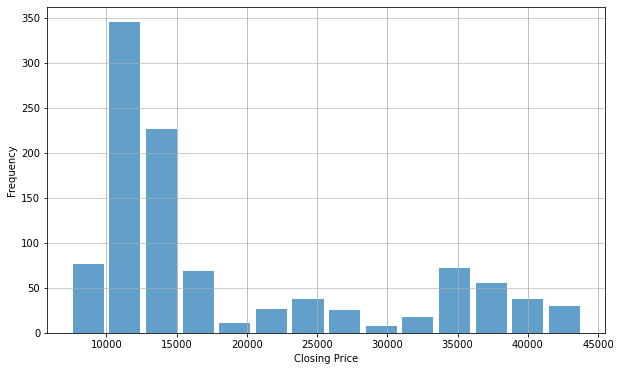

In [8]:
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(
    x=df_train['Closing Price'], bins='auto', 
    alpha=0.7, rwidth=0.85
)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

<Figure size 864x432 with 0 Axes>

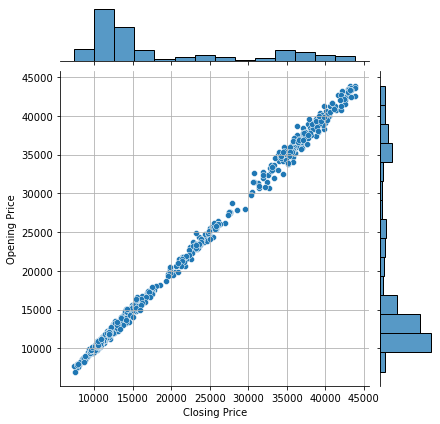

In [9]:
plt.figure(figsize=(12,6))

sns.jointplot(
    x="Closing Price", y="Opening Price",
    edgecolor="white",
    data=df_train
)

plt.xlabel("Closing Price")
plt.ylabel("Opening Price")
plt.grid(True)
plt.show()

In [10]:
def fit(X, y, degree=3):
    coef = polyfit(X, y, degree) 
    trendpoly = np.poly1d(coef) 
    return trendpoly(X)

def get_season(s, yearly_periods=4, degree=3): 
    X = [i%(365/4)for i in range(0,len(s))] 
    seasonal = fit(X, s.values, degree)
    return pd.Series(data=seasonal, index=s.index)

def get_trend(s, degree=3):
    X =list(range(len(s))) 
    trend = fit(X, s.values, degree)
    return pd.Series(data=trend, index=s.index)

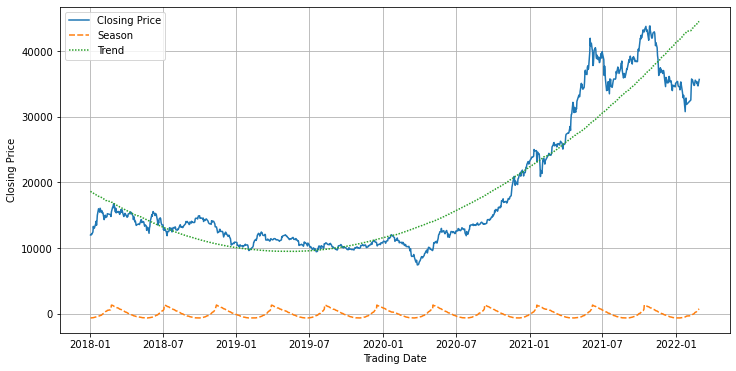

In [11]:
plt.figure(figsize=(12,6))

df_train['Trend'] = get_trend(df_train['Closing Price'])
df_train['Season'] = get_season(df_train['Closing Price'] - df_train['Trend'])

sns.lineplot(data=df_train[['Closing Price', 'Season', 'Trend']])
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

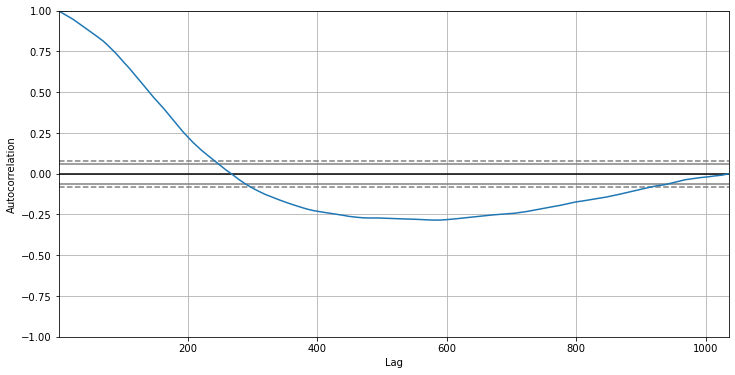

In [12]:
plt.figure(figsize=(12, 6))
pd.plotting.autocorrelation_plot(df_train['Closing Price'])
plt.show()

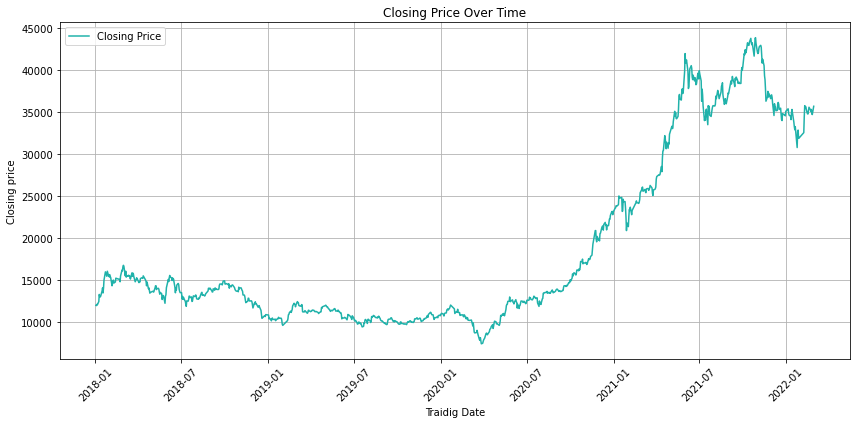

In [13]:
plt.figure(figsize=(12, 6))

plt.plot(df_train.index, df_train['Closing Price'], linestyle='-', color='lightseagreen', label='Closing Price')

plt.title('Closing Price Over Time')
plt.xlabel('Traidig Date')
plt.ylabel('Closing price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

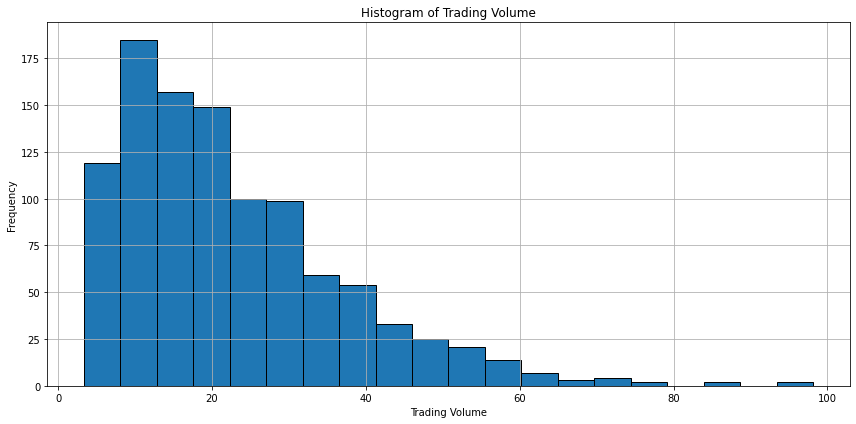

In [14]:
plt.figure(figsize=(12, 6))

plt.hist(df_train['Trading Volume'], bins=20, edgecolor='black')

plt.title('Histogram of Trading Volume')
plt.xlabel('Trading Volume')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

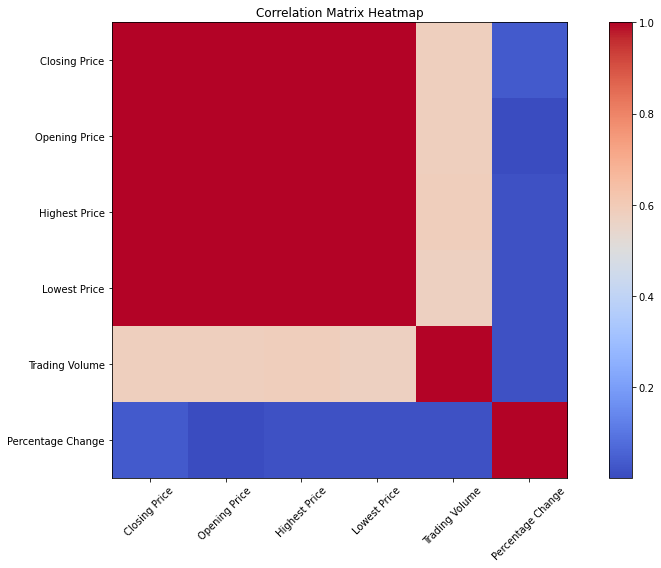

In [15]:
plt.figure(figsize=(12, 8))

corr_matrix = df_train[['Closing Price', 'Opening Price', 'Highest Price', 'Lowest Price', 'Trading Volume', 'Percentage Change']].corr()

plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title('Correlation Matrix Heatmap')
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=45)
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
plt.tight_layout()
plt.show()

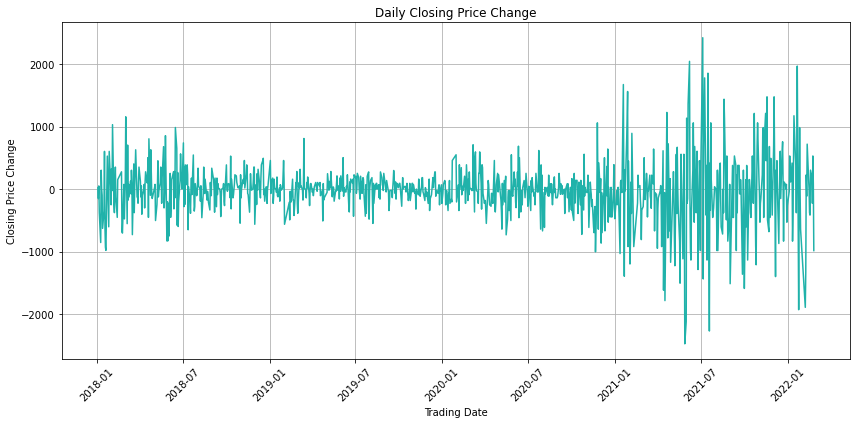

In [16]:
plt.figure(figsize=(12, 6))

df_train['Daily Change'] = df_train['Closing Price'].diff()

plt.plot(df_train.index, df_train['Daily Change'], linestyle='-', color='lightseagreen')
plt.title('Daily Closing Price Change')
plt.xlabel('Trading Date')
plt.ylabel('Closing Price Change')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

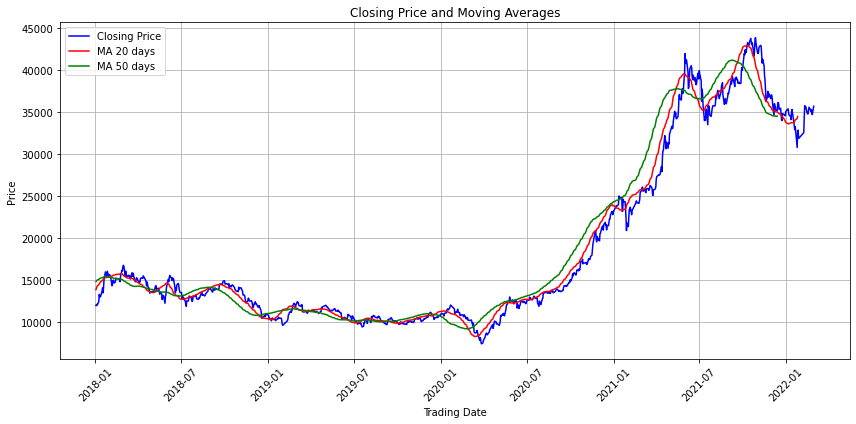

In [17]:
plt.figure(figsize=(12, 6))

df_train['MA 20'] = df_train['Closing Price'].rolling(window=20).mean()
df_train['MA 50'] = df_train['Closing Price'].rolling(window=50).mean()

plt.plot(df_train.index, df_train['Closing Price'], linestyle='-', color='b', label='Closing Price')
plt.plot(df_train.index, df_train['MA 20'], linestyle='-', color='r', label='MA 20 days')
plt.plot(df_train.index, df_train['MA 50'], linestyle='-', color='g', label='MA 50 days')
plt.title('Closing Price and Moving Averages')
plt.xlabel('Trading Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

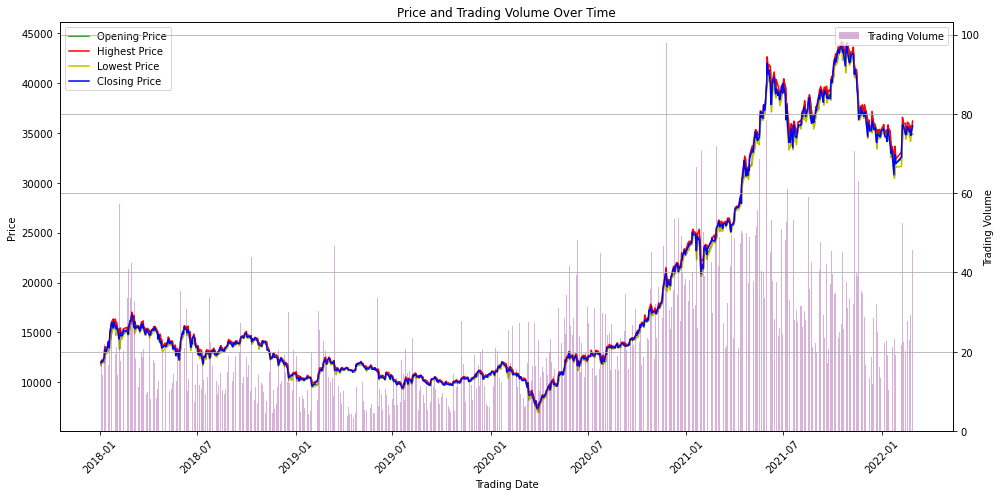

In [18]:
fig, ax1 = plt.subplots(figsize=(14, 7))

ax1.plot(df_train.index, df_train['Opening Price'], linestyle='-', color='g', label='Opening Price')
ax1.plot(df_train.index, df_train['Highest Price'], linestyle='-', color='r', label='Highest Price')
ax1.plot(df_train.index, df_train['Lowest Price'], linestyle='-', color='y', label='Lowest Price')
ax1.plot(df_train.index, df_train['Closing Price'], linestyle='-', color='b', label='Closing Price')
ax1.set_xlabel('Trading Date')
ax1.set_ylabel('Price')
ax1.tick_params(axis='x', rotation=45)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.bar(df_train.index, df_train['Trading Volume'], color='purple', alpha=0.3, label='Trading Volume')
ax2.set_ylabel('Trading Volume')
ax2.legend(loc='upper right')

plt.title('Price and Trading Volume Over Time')
plt.grid(True)
plt.tight_layout()
plt.show()

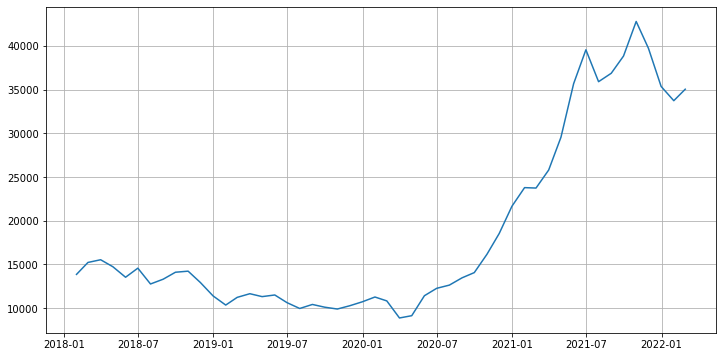

In [19]:
plt.figure(figsize=(12, 6))

plt.plot(df_train['Closing Price'].resample('M').mean())

plt.grid(True)
plt.show()

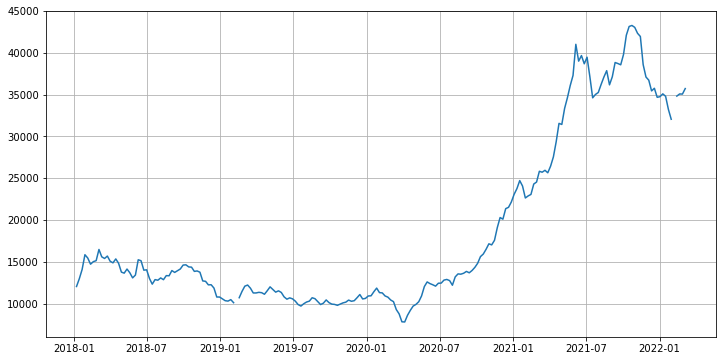

In [20]:
plt.figure(figsize=(12, 6))

plt.plot(df_train['Closing Price'].resample('W').mean())

plt.grid(True)
plt.show()

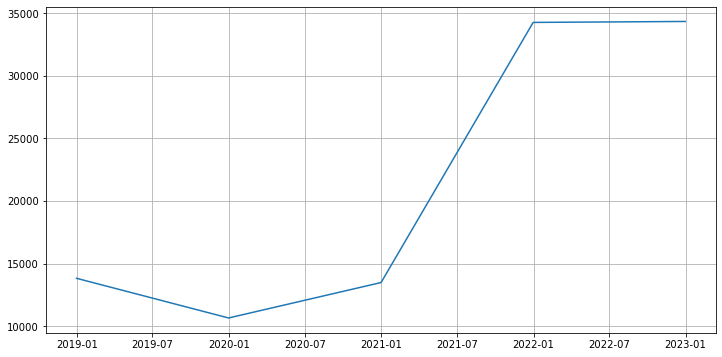

In [21]:
plt.figure(figsize=(12, 6))

plt.plot(df_train['Closing Price'].resample('Y').mean())

plt.grid(True)
plt.show()

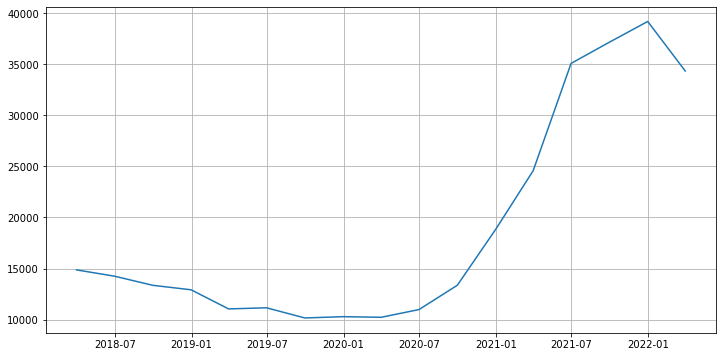

In [22]:
plt.figure(figsize=(12, 6))

plt.plot(df_train['Closing Price'].resample('Q').mean())

plt.grid(True)
plt.show()

# Feature Enginering

In [23]:
df_train.isnull().sum()

Closing Price         0
Opening Price         0
Highest Price         0
Lowest Price          0
Trading Volume        0
Percentage Change     0
Trend                 0
Season                0
Daily Change          1
MA 20                19
MA 50                49
dtype: int64

In [24]:
df_train.drop(columns=['MA 20', 'MA 50', 'Trend', 'Season', 'Daily Change'], inplace=True)

In [25]:
df_train.isnull().sum()

Closing Price        0
Opening Price        0
Highest Price        0
Lowest Price         0
Trading Volume       0
Percentage Change    0
dtype: int64

In [26]:
df_test = pd.read_csv('test data.csv', parse_dates=['Trading Date'], index_col=['Trading Date'])
df_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 273 entries, 2023-03-31 to 2022-03-01
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Closing Price      273 non-null    float64
 1   Opening Price      273 non-null    float64
 2   Highest Price      273 non-null    float64
 3   Lowest Price       273 non-null    float64
 4   Trading Volume     273 non-null    float64
 5   Percentage Change  273 non-null    float64
dtypes: float64(6)
memory usage: 14.9 KB


In [27]:
x_train = df_train.drop(columns=['Closing Price'])
y_train = df_train['Closing Price']
x_test = df_test.drop(columns=['Closing Price'])
y_test = df_test['Closing Price']

In [28]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# ML Modeling

In [29]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Khởi tạo mô hình Gradient Boosting
xgb_reg = XGBRegressor(
    max_depth=5,
    n_estimators=100,
    learning_rate=0.1,
    objective='reg:squarederror',
    random_state=42
)

# Huấn luyện mô hình
xgb_reg.fit(x_train_scaled, y_train)

# Dự đoán trên tập test
test_predictions_xgb = xgb_reg.predict(x_test_scaled)

mse = mean_squared_error(y_test, test_predictions_xgb)
rmse = mean_squared_error(y_test, test_predictions_xgb) ** 0.5
r2 = r2_score(y_test, test_predictions_xgb)
mae = mean_absolute_error(y_test, test_predictions_xgb)
mape = 100 * (np.abs(y_test - test_predictions_xgb) / y_test).mean()

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}%")

MSE: 158683.31
RMSE: 398.35
R-squared: 1.00
MAE: 287.05
MAPE: 1.39%


In [30]:
from sklearn.neighbors import KNeighborsRegressor
from dtaidistance import dtw

# Định nghĩa mô hình KNN-DTW
knn_dtw = KNeighborsRegressor(n_neighbors=5, metric=lambda x, y: dtw.distance(x, y))

# Huấn luyện mô hình
knn_dtw.fit(x_train, y_train)

# Dự đoán trên tập kiểm tra
test_predictions_knn = knn_dtw.predict(x_test)

# Đánh giá mô hình
mse = mean_squared_error(y_test, test_predictions_knn)
rmse = mean_squared_error(y_test, test_predictions_knn) ** 0.5
r2 = r2_score(y_test, test_predictions_knn)
mae = mean_absolute_error(y_test, test_predictions_knn)
mape = 100 * (np.abs(y_test - test_predictions_knn) / y_test).mean()

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}%")

MSE: 165699.31
RMSE: 407.06
R-squared: 1.00
MAE: 311.02
MAPE: 1.53%


In [31]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Create the GridSearchCV object
grid_search_xgb = GridSearchCV(XGBRegressor(objective='reg:squarederror', random_state=42),
                          param_grid=param_grid,
                          cv=5,
                          scoring='neg_mean_squared_error',
                          n_jobs=-1)

# Fit the GridSearchCV object
grid_search_xgb.fit(x_train, y_train)

# Print the best hyperparameters and the corresponding score
print(f"Best hyperparameters: {grid_search_xgb.best_params_}")
print(f"Best score: {-grid_search_xgb.best_score_:.2f}")

# Create the final model with the best hyperparameters
best_xgb_reg = XGBRegressor(**grid_search_xgb.best_params_, objective='reg:squarederror', random_state=42)
best_xgb_reg.fit(x_train, y_train)

# Make predictions on the test set
test_predictions_xgb_tuning = best_xgb_reg.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, test_predictions_xgb_tuning)
rmse = mean_squared_error(y_test, test_predictions_xgb_tuning) ** 0.5
r2 = r2_score(y_test, test_predictions_xgb_tuning)
mae = mean_absolute_error(y_test, test_predictions_xgb_tuning)
mape = 100 * (np.abs(y_test - test_predictions_xgb_tuning) / y_test).mean()

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}%")

Best hyperparameters: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.8}
Best score: 10496896.82
MSE: 123618.10
RMSE: 351.59
R-squared: 1.00
MAE: 254.05
MAPE: 1.22%


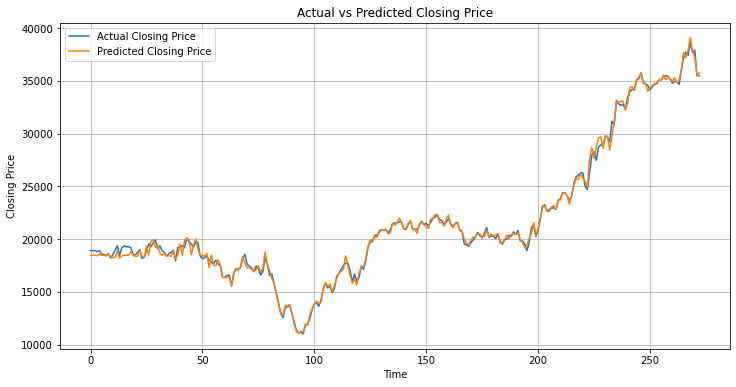

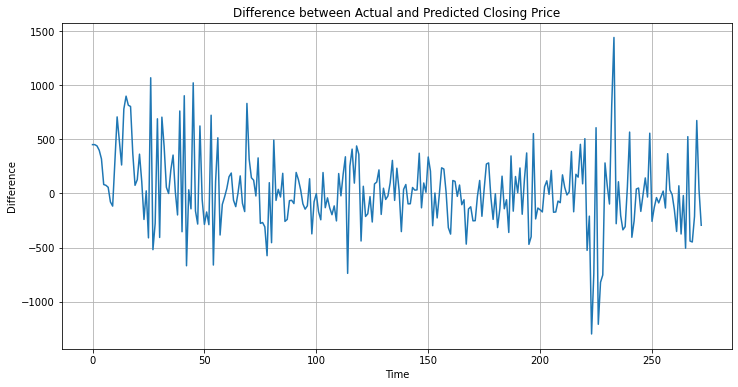

In [32]:
# Vẽ biểu đồ so sánh
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test)), y_test, label='Actual Closing Price')
plt.plot(range(len(y_test)), test_predictions_xgb_tuning, label='Predicted Closing Price')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.title('Actual vs Predicted Closing Price')
plt.legend()
plt.grid()
plt.show()

# Tính toán và vẽ biểu đồ chênh lệch
diff = y_test - test_predictions_xgb_tuning
plt.figure(figsize=(12, 6))
plt.plot(range(len(diff)), diff)
plt.xlabel('Time')
plt.ylabel('Difference')
plt.title('Difference between Actual and Predicted Closing Price')
plt.grid()
plt.show()

In [33]:
# Define the parameter grid for grid search
param_grid = {
    'n_neighbors': [3, 5, 7, 10],
    'metric': [lambda x, y: dtw.distance(x, y), 'euclidean', 'cosine']
}

# Perform grid search to find the best hyperparameters
grid_search_knn = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='r2')
grid_search_knn.fit(x_train, y_train)

# Get the best hyperparameters and the best score
best_params = grid_search_knn.best_params_
best_score = grid_search_knn.best_score_
print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)

# Create the final model with the best hyperparameters
best_knn_dtw = KNeighborsRegressor(n_neighbors=best_params['n_neighbors'], metric=best_params['metric'])
best_knn_dtw.fit(x_train, y_train)

# Evaluate the final model on the test set
test_predictions_knn_tuning = knn_dtw.predict(x_test)

mse = mean_squared_error(y_test, test_predictions_knn_tuning)
rmse = mean_squared_error(y_test, test_predictions_knn_tuning) ** 0.5
r2 = r2_score(y_test, test_predictions_knn_tuning)
mae = mean_absolute_error(y_test, test_predictions_knn_tuning)
mape = 100 * (np.abs(y_test - test_predictions_xgb_tuning) / y_test).mean()

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}%")

Best Hyperparameters: {'metric': <function <lambda> at 0x000002342C99C280>, 'n_neighbors': 3}
Best Score: -0.10107654906264549
MSE: 165699.31
RMSE: 407.06
R-squared: 1.00
MAE: 311.02
MAPE: 1.22%


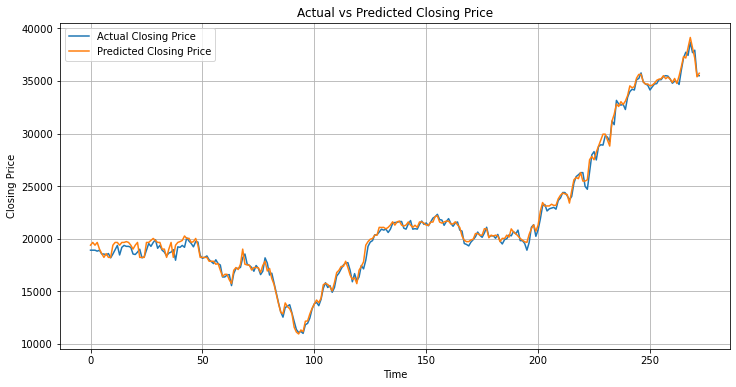

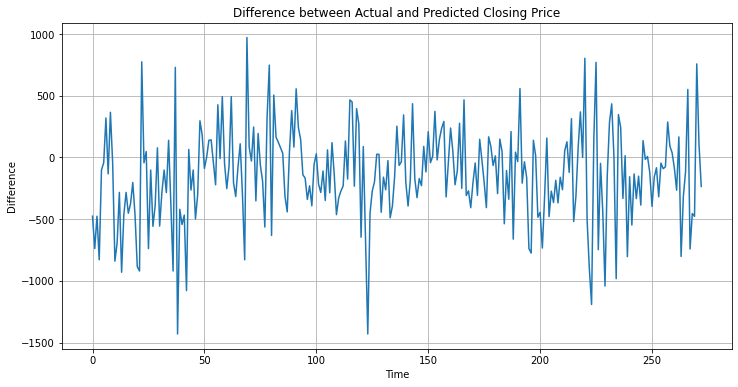

In [34]:
# Vẽ biểu đồ so sánh
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test)), y_test, label='Actual Closing Price')
plt.plot(range(len(y_test)), test_predictions_knn_tuning, label='Predicted Closing Price')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.title('Actual vs Predicted Closing Price')
plt.legend()
plt.grid()
plt.show()

# Tính toán và vẽ biểu đồ chênh lệch
diff = y_test - test_predictions_knn_tuning
plt.figure(figsize=(12, 6))
plt.plot(range(len(diff)), diff)
plt.xlabel('Time')
plt.ylabel('Difference')
plt.title('Difference between Actual and Predicted Closing Price')
plt.grid()
plt.show()